In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from AST425 import *

2025-05-14 09:33:12.019771: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 09:33:12.021405: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 09:33:12.027820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 09:33:12.048390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747229592.083278  203908 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747229592.09

In [2]:
#shape of VAE is 38, 100, 100, 2, 100, 100 38

In [3]:
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 13

Data preprocessing (same step for all methods):

In [4]:
data = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [5]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [6]:
ASPCAPFLAG

0             0
1             0
2             0
3         16384
4             0
          ...  
370055        0
370056    16384
370057        0
370058        0
370059        0
Name: ASPCAPFLAG, Length: 370060, dtype: int64

(Text(0.5, 0, 'Right Ascension ($\\degree$)'),
 Text(0, 0.5, 'Declination ($\\degree$)'))

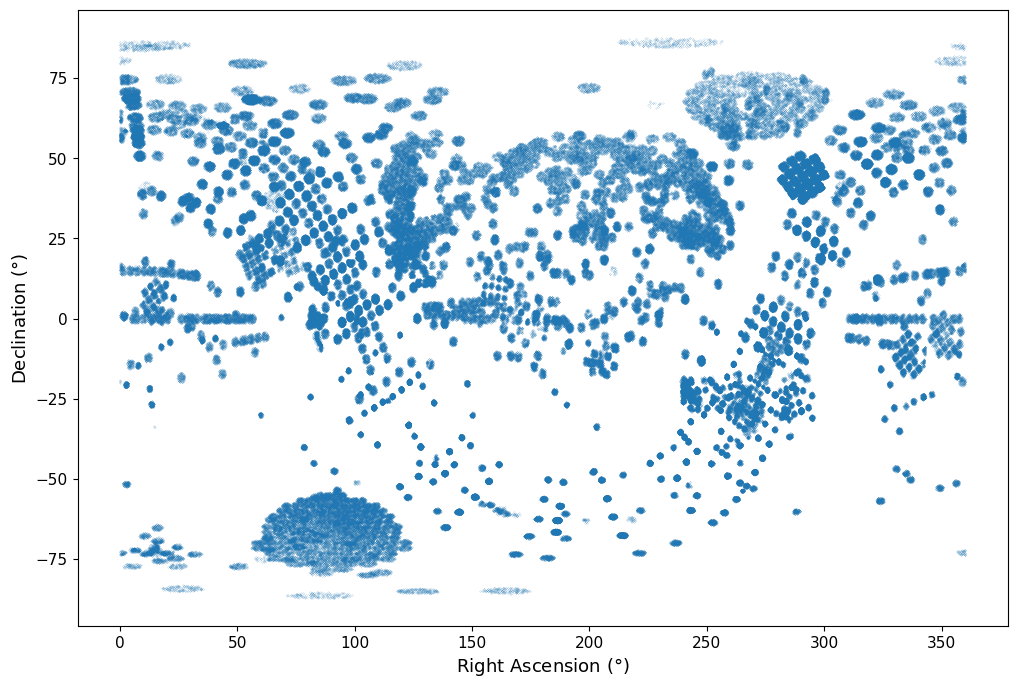

In [7]:
plt.figure(figsize = (12, 8))
plt.scatter(ra, dec, s=0.01)
plt.xlabel(r'Right Ascension ($\degree$)'), plt.ylabel('Declination ($\degree$)')
# plt.savefig('apogee_stars.png', fmt='png')

In [8]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)
    
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


In [9]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

In [10]:
FE_H_err, C_FE_err, CI_FE_err = filtered_data[23], filtered_data[25], filtered_data[27]
N_FE_err, O_FE_err, MG_FE_err = filtered_data[29], filtered_data[31], filtered_data[33]
AL_FE_err, SI_FE_err, P_FE_err = filtered_data[35], filtered_data[37], filtered_data[39]
S_FE_err, K_FE_err, CA_FE_err = filtered_data[41], filtered_data[43], filtered_data[45]
TI_FE_err, TIII_FE_err, V_FE_err = filtered_data[47], filtered_data[49], filtered_data[51]
CR_FE_err, MN_FE_err, CO_FE_err, NI_FE_err = filtered_data[53], filtered_data[55], filtered_data[57], filtered_data[59]
RV_err  = filtered_data[10]

In [11]:
train_size = round(0.8 * len(filtered_data[0]))
test_size = round(0.1 * len(filtered_data[0]))
validation_size = round(0.1 * len(filtered_data[0]))

training_labels_raw = np.transpose(np.array([FE_H_filtered[:train_size], C_FE_filtered[:train_size], CI_FE_filtered[:train_size], 
                                        N_FE_filtered[:train_size], O_FE_filtered[:train_size], MG_FE_filtered[:train_size],
                                        AL_FE_filtered[:train_size], SI_FE_filtered[:train_size], P_FE_filtered[:train_size],
                                        S_FE_filtered[:train_size], K_FE_filtered[:train_size], CA_FE_filtered[:train_size],
                                        TI_FE_filtered[:train_size], TIII_FE_filtered[:train_size], V_FE_filtered[:train_size], 
                                        CR_FE_filtered[:train_size], MN_FE_filtered[:train_size], CO_FE_filtered[:train_size], NI_FE_filtered[:train_size]]))

error_training_labels_raw = np.transpose(np.array([FE_H_err[:train_size], C_FE_err[:train_size], CI_FE_err[:train_size], 
                                        N_FE_err[:train_size], O_FE_err[:train_size], MG_FE_err[:train_size],
                                        AL_FE_err[:train_size], SI_FE_err[:train_size], P_FE_err[:train_size],
                                        S_FE_err[:train_size], K_FE_err[:train_size], CA_FE_err[:train_size],
                                        TI_FE_err[:train_size], TIII_FE_err[:train_size], V_FE_err[:train_size], 
                                        CR_FE_err[:train_size], MN_FE_err[:train_size], CO_FE_err[:train_size], NI_FE_err[:train_size]]))


test_labels_raw = np.transpose(np.array([FE_H_filtered[train_size: train_size + test_size], C_FE_filtered[train_size: train_size + test_size], 
                                     CI_FE_filtered[train_size: train_size + test_size], N_FE_filtered[train_size: train_size + test_size],
                                     O_FE_filtered[train_size: train_size + test_size], MG_FE_filtered[train_size: train_size + test_size],
                                        AL_FE_filtered[train_size: train_size + test_size], SI_FE_filtered[train_size: train_size + test_size], 
                                     P_FE_filtered[train_size: train_size + test_size], S_FE_filtered[train_size: train_size + test_size], 
                                     K_FE_filtered[train_size: train_size + test_size], CA_FE_filtered[train_size: train_size + test_size],
                                        TI_FE_filtered[train_size: train_size + test_size], TIII_FE_filtered[train_size: train_size + test_size], 
                                     V_FE_filtered[train_size: train_size + test_size], CR_FE_filtered[train_size: train_size + test_size], 
                                     MN_FE_filtered[train_size: train_size + test_size], CO_FE_filtered[train_size: train_size + test_size], 
                                     NI_FE_filtered[train_size: train_size + test_size]]))
                                     
                                     
error_test_labels_raw = np.transpose(np.array([FE_H_err[train_size: train_size + test_size], C_FE_err[train_size: train_size + test_size], CI_FE_err[train_size: train_size + test_size], 
                                        N_FE_err[train_size: train_size + test_size], O_FE_err[train_size: train_size + test_size], MG_FE_err[train_size: train_size + test_size],
                                        AL_FE_err[train_size: train_size + test_size], SI_FE_err[train_size: train_size + test_size], P_FE_err[train_size: train_size + test_size],
                                        S_FE_err[train_size: train_size + test_size], K_FE_err[train_size: train_size + test_size], CA_FE_err[train_size: train_size + test_size],
                                        TI_FE_err[train_size: train_size + test_size], TIII_FE_err[train_size: train_size + test_size], V_FE_err[train_size: train_size + test_size], 
                                        CR_FE_err[train_size: train_size + test_size], MN_FE_err[train_size: train_size + test_size], CO_FE_err[train_size: train_size + test_size], NI_FE_err[train_size: train_size + test_size]]))


validation_labels_raw = np.transpose(np.array([FE_H_filtered[train_size + test_size: train_size + test_size + validation_size], C_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     CI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], N_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                     O_FE_filtered[train_size + test_size: train_size + test_size + validation_size], MG_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_filtered[train_size + test_size: train_size + test_size + validation_size], SI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     P_FE_filtered[train_size + test_size: train_size + test_size + validation_size], S_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     K_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CA_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], TIII_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     V_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CR_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     MN_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CO_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     NI_FE_filtered[train_size + test_size: train_size + test_size + validation_size]]))
                                     
                                     
error_validation_labels_raw = np.transpose(np.array([FE_H_err[train_size + test_size: train_size + test_size + validation_size], C_FE_err[train_size + test_size: train_size + test_size + validation_size], CI_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        N_FE_err[train_size + test_size: train_size + test_size + validation_size], O_FE_err[train_size + test_size: train_size + test_size + validation_size], MG_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_err[train_size + test_size: train_size + test_size + validation_size], SI_FE_err[train_size + test_size: train_size + test_size + validation_size], P_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        S_FE_err[train_size + test_size: train_size + test_size + validation_size], K_FE_err[train_size + test_size: train_size + test_size + validation_size], CA_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_err[train_size + test_size: train_size + test_size + validation_size], TIII_FE_err[train_size + test_size: train_size + test_size + validation_size], V_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        CR_FE_err[train_size + test_size: train_size + test_size + validation_size], MN_FE_err[train_size + test_size: train_size + test_size + validation_size], CO_FE_err[train_size + test_size: train_size + test_size + validation_size], NI_FE_err[train_size + test_size: train_size + test_size + validation_size]]))


In [12]:
full_training_labels_raw = np.c_[training_labels_raw, error_training_labels_raw]
full_test_labels_raw = np.c_[test_labels_raw, error_test_labels_raw]
full_validation_labels_raw = np.c_[validation_labels_raw, error_validation_labels_raw]

In [13]:
full_training_labels_raw.shape, full_test_labels_raw.shape, full_validation_labels_raw.shape

((115814, 38), (14477, 38), (14476, 38))

In [14]:
np.min(full_training_labels_raw.T, axis=1), np.max(full_training_labels_raw.T, axis=1)

(array([-1.951497  , -2.1234312 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.15558027, -0.47890055, -0.15707995, -0.97891414, -0.6047195 ,
        -2.2741165 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.391077  , -0.64225805, -3.6896837 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([5.7460123e-01, 8.3517190e-01, 5.6674075e-01, 3.6616602e+00,
        5.5585840e-01, 5.1025960e-01, 4.8934165e-01, 4.5210746e-01,
        7.5247210e+00, 9.0582700e-01, 1.0242985e+00, 2.7282690e-01,
        5.9501344e-01, 8.7636330e-01, 8.6697330e-01, 3.3210137e-01,
        3.5304812e-01, 5.6587050e-01, 2.1270613e-01, 4.5790780e-01,
        1.2761971e+00, 1.6784387e+00, 1.8850280e+01, 5.6260234e-01,
        5.5715760e-01, 6.7058295

Remove unreasonably huge errors bars or unphysical abundance estimates:

In [15]:
err_threshold = 3 # remove errors that are larger than this...
err_mask_train = np.all(np.abs(full_training_labels_raw) < err_threshold, axis=1)
err_mask_test = np.all(np.abs(full_test_labels_raw) < err_threshold, axis=1)
err_mask_validation = np.all(np.abs(full_validation_labels_raw) < err_threshold, axis=1)

full_training_labels = full_training_labels_raw[err_mask_train]
full_test_labels = full_test_labels_raw[err_mask_test]
full_validation_labels = full_validation_labels_raw[err_mask_validation]

In [16]:
full_training_labels.shape, full_test_labels.shape, full_validation_labels.shape

((114885, 38), (14374, 38), (14326, 38))

In [17]:
np.min(full_training_labels.T, axis=1), np.max(full_training_labels.T, axis=1)

(array([-1.8320073 , -1.2602895 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.1388877 , -0.47890055, -0.13207644, -0.97891414, -0.5242982 ,
        -0.7713039 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.0536897 , -0.64225805, -1.1330373 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([0.57460123, 0.81556314, 0.56674075, 1.5901425 , 0.5558584 ,
        0.5102596 , 0.48934165, 0.45210746, 1.0318542 , 0.905827  ,
        1.0242985 , 0.262527  , 0.59501344, 0.8763633 , 0.8669733 ,
        0.27449507, 0.35304812, 0.5658705 , 0.21270613, 0.35667247,
        0.48992783, 1.637775  , 1.0633858 , 0.46304193, 0.43964195,
        0.55135024, 0.46292186, 2.998515  , 0.55373484, 2.87389   ,
        1.0069572 , 0.7626475 , 

Manual scaler to standardize (equivalent to StandardScaler):

In [18]:
# standardized_pca_array = []
# standardization_means = np.zeros(len(np.array(x_df_transpose)))
# standardization_sigmas = np.zeros(len(np.array(x_df_transpose)))

# for i, param in enumerate(np.array(x_df_transpose)):
#     mean, sigma = np.mean(param), np.std(param)
#     norm = (param - mean)/sigma
#     standardized_pca_array.append(norm)
#     standardization_means[i] = mean
#     standardization_sigmas[i] = sigma

StandardScaler to standardize (same method for t-SNE/UMAP):

In [19]:
from sklearn.preprocessing import StandardScaler

# split abundances and errors into separate datasets
training_labels_abundances = full_training_labels[:, :19]
training_labels_errors = full_training_labels[:, 19:]

test_labels_abundances = full_test_labels[:, :19]
test_labels_errors = full_test_labels[:, 19:]

validation_labels_abundances = full_validation_labels[:, :19]
validation_labels_errors = full_validation_labels[:, 19:]

# standardize means fitting and transforming with standard scaler, standardize errors by scaling by the scale factor (mean will shift but this does not change the errors)
training_scaler = StandardScaler().fit(training_labels_abundances)
standardized_abundance_training_arr = training_scaler.transform(training_labels_abundances)
standardized_error_training_arr = training_labels_errors/training_scaler.scale_
standardized_full_training_arr = np.c_[standardized_abundance_training_arr, standardized_error_training_arr]

test_scaler = StandardScaler().fit(test_labels_abundances)
standardized_abundance_test_arr = test_scaler.transform(test_labels_abundances)
standardized_error_test_arr = test_labels_errors/test_scaler.scale_
standardized_full_test_arr = np.c_[standardized_abundance_test_arr, standardized_error_test_arr]

validation_scaler = StandardScaler().fit(validation_labels_abundances)
standardized_abundance_validation_arr = validation_scaler.transform(validation_labels_abundances)
standardized_error_validation_arr = validation_labels_errors/validation_scaler.scale_
standardized_full_validation_arr = np.c_[standardized_abundance_validation_arr, standardized_error_validation_arr]

Begin VAE stuff:

# SAMPLING LAYER

In [20]:
class Sampling(layers.Layer):
    """Uses (mean, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# ENCODER

Original encoder (mean/var -> mean/var)

In [21]:
# latent_dim = 2

# encoder_inputs = keras.Input(shape=(38,)) #to predict error, inputs is 38

# x = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)

# mean = layers.Dense(latent_dim, name="mean")(x)
# log_var = layers.Dense(latent_dim, name="log_var")(x)
# # z = Sampling()([mean, log_var])
# encoder = keras.Model(encoder_inputs, [mean, log_var], name="encoder")

In [22]:
latent_dim = 2

# (38, ) code

encoder_inputs = keras.Input(shape=(38, )) #19 x 2 instead of 38, 

# mean should only depend on mean

x_mu = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs[:,:encoder_inputs.shape[1]//2])
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)

# shape of (None, latent_dim)
mean = layers.Dense(latent_dim, name="mean")(x_mu)

# variance can take in both mean and variance

# first flatten the data
# x_log_var = tf.keras.layers.Flatten()(encoder_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# shape of (None, latent_dim)
class mu_var(tf.keras.Layer):
    def call(self, x_mu, x_log_var):
        return tf.concat([x_mu, x_log_var], axis=1)

log_var = tf.keras.layers.Dense(latent_dim, name="log_var")(mu_var()(x_mu, x_log_var))

# mean and log var together
encoder = keras.Model(encoder_inputs, [mean, log_var], name="encoder")
encoder.summary()

# (19, 2) code (doesn't work yet, have to figure out how to get it to work)

# encoder_inputs = keras.Input(shape=(19, 2)) #19 x 2 instead of 38, 

# # 0 index slice is mu, 1 index slice is log var

# # mean should only depend on mean

# x_mu = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs[:,:,0])
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)

# # shape of (None, latent_dim)
# mean = layers.Dense(latent_dim, name="mean")(x_mu)

# # variance can take in both mean and variance

# # first flatten the data
# x_log_var = tf.keras.layers.Flatten()(encoder_inputs)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# # shape of (None, latent_dim)
# log_var = layers.Dense(latent_dim, name="log_var")(tf.concat([x_mu, x_log_var], 1))

# # first reshapes mean and log var to have shape of (1, latent_dim) each and then concatenates them so they have shape of 
# # (2, latent_dim) to put in to the decoder
# encoder = keras.Model(encoder_inputs, tf.concat([tf.reshape(mean, (1, latent_dim)), tf.reshape(log_var, (1, latent_dim))], 0), name="encoder")


2025-05-14 09:33:19.657536: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 19)        │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │      2,000 │ get_item[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 100)       │      3,900 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 100)       │     10,100 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 100)       │     10,100 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 100)       │     10,100 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 100)       │     10,100 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 100)       │     10,100 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 100)       │     10,100 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_var (mu_var)     │ (None, 200)       │          0 │ dense_3[0][0],    │
│                     │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mean (Dense)        │ (None, 2)         │        202 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ log_var (Dense)     │ (None, 2)         │        402 │ mu_var[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,104 (262.12 KB)

 Trainable params: 67,104 (262.12 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Structure of old NN:
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='linear'),
#     tf.keras.layers.Dense(38)

# DECODER

Original decoder (mean/var -> mean/var)

In [24]:
# latent_inputs = keras.Input(shape=(2 * latent_dim,))

# x = layers.Dense(100, activation="gelu")(latent_inputs)
# x = layers.Dense(100, activation="gelu")(x)
# x = layers.Dense(100, activation="gelu")(x)
# x = layers.Dense(100, activation='gelu')(x)

# decoder_outputs = layers.Dense(38, activation="linear")(x)

# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# #decoder.summary()

Define shape as (19, 2) instead of (38, )

In [25]:
# (19, 2) instead of (38, ) code:

# latent_inputs = keras.Input(shape=(latent_dim, 2))

# x_mu = layers.Dense(100, activation="gelu")(latent_inputs[:,:,0])
# x_mu = layers.Dense(100, activation="gelu")(x_mu)
# x_mu = layers.Dense(100, activation="gelu")(x_mu)
# x_mu = layers.Dense(100, activation='gelu')(x_mu)

# mean_outputs = layers.Dense(19, activation="linear")(x_mu)

# # flatten again
# x_log_var = tf.keras.layers.Flatten()(latent_inputs)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# var_outputs = layers.Dense(19, activation="linear")(tf.concat([x_mu, x_log_var], 1))

# decoder = keras.Model(latent_inputs, [mean_outputs, var_outputs], name="decoder")

# (38, ) code

class mu_var(tf.keras.Layer):
    def call(self, x_mu, x_log_var):
        return tf.concat([x_mu, x_log_var], axis=1)

latent_inputs = keras.Input(shape=(2 * latent_dim, ))

# again only take in mean
x_mu = layers.Dense(100, activation="gelu")(latent_inputs[:,:latent_inputs.shape[1]//2])
x_mu = layers.Dense(100, activation="gelu")(x_mu)
x_mu = layers.Dense(100, activation="gelu")(x_mu)
x_mu = layers.Dense(100, activation='gelu')(x_mu)

mean_outputs = layers.Dense(19, activation="linear")(x_mu)

x_log_var = tf.keras.layers.Dense(100, activation='gelu')(latent_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

var_outputs = layers.Dense(19, activation="linear")(mu_var()(x_mu, x_log_var))

decoder = keras.Model(latent_inputs, [mean_outputs, var_outputs], name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 2)         │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 100)       │        300 │ get_item_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 100)       │        500 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 100)       │     10,100 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 100)       │     10,100 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 100)       │     10,100 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 100)       │     10,100 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 100)       │     10,100 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 100)       │     10,100 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_var_1 (mu_var)   │ (None, 200)       │          0 │ dense_11[0][0],   │
│                     │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 19)        │      1,919 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 19)        │      3,819 │ mu_var_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,138 (262.26 KB)

 Trainable params: 67,138 (262.26 KB)

 Non-trainable params: 0 (0.00 B)

# DEFINE VAE

In [26]:
# alpha = 1e-15  # learning rate
# # optimizer uses Adam with learning rate 1e-7
# optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)

# ### CUSTOM LR SCHEDULER
# lr_start   = 1e-7
# lr_max     = 1e-4
# lr_min     = 1e-12
# lr_ramp_ep  = 3
# lr_sus_ep  = 0
# lr_decay   = 0.7
   
# def lrfn(epoch, lr_start=lr_start, lr_max=lr_max, lr_min=lr_min, lr_ramp_ep=lr_ramp_ep, lr_sus_ep=lr_sus_ep, lr_decay=lr_decay):
#     if epoch < lr_ramp_ep:
#         lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
#     elif epoch < lr_ramp_ep + lr_sus_ep:
#         lr = lr_max
#     else:
#         lr = (lr_max - lr_min) * lr_decay **(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
#     return lr

# # Using this Custom Function, create a Callback
# lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

### COSINE ANNEALING

initial_lr = 1.e-4
decay_steps = int(1e5)  # total number of steps to decay over
alpha = 1.e-3          # minimum learning rate = alpha * initial_lr

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=alpha
)
 
# def mse_loss(y_true, y_pred):
#     r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
#     return 1000 * r_loss
 
# def kl_loss(mean, log_var):
#     kl_loss =  -0.5 * K.sum(1 + log_var - K.square(mean) - K.exp(log_var), axis = 1)
#     return kl_loss
 
# def vae_loss(y_true, y_pred, mean, var):
#     r_loss = mse_loss(y_true, y_pred)
#     kl_loss = kl_loss(mean, log_var)
#     return  r_loss + kl_loss

Wasserstein distance implementation check:

In [27]:
from scipy.stats import wasserstein_distance
import numpy as np

# Sample parameters for the two Gaussians
mean1, std1 = 0, 1  # First Gaussian: N(0, 1)
mean2, std2 = 2, 1.5  # Second Gaussian: N(2, 1.5)

# Generate samples
np.random.seed(0)
samples1 = np.random.normal(mean1, std1, size=10000)
samples2 = np.random.normal(mean2, std2, size=10000)

# Compute the Wasserstein distance
distance = wasserstein_distance(samples1, samples2)

print(f"Wasserstein distance: {distance:.4f}")

# Analytical 1D Wasserstein distance for Gaussians
analytical_distance = np.sqrt((mean1 - mean2)**2 + (std1 - std2)**2)
print(f"Analytical Wasserstein distance: {analytical_distance:.6f}")
print(f'analytical wasserstein alternate: {np.sqrt(np.linalg.norm(mean1 - mean2) ** 2 + (std1 ** 2 + std2 ** 2 - 2 * (np.sqrt(std2 ** 2) * std1 ** 2 * np.sqrt(std2 ** 2)) ** (1/2))):.6f}')
tf.sqrt(tf.square(float(mean1) - float(mean2)) + tf.square(tf.sqrt(tf.exp(float(2 * np.log(std1)))) - tf.sqrt(tf.exp(float(2 * np.log(std2))))))

Wasserstein distance: 2.0352
Analytical Wasserstein distance: 2.061553
analytical wasserstein alternate: 2.061553


<tf.Tensor: shape=(), dtype=float32, numpy=2.0615527629852295>

Diagnostics:

In [28]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import numpy as np

def plot_latent_space_live(encoder, data, labels=None, epoch=None):
    z_mean, z_log_var = encoder.predict(data, batch_size=256)
    z_std = np.exp(0.5 * z_log_var)

    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    if labels is not None:
        scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap='viridis', s=3)
        plt.colorbar(scatter)
    else:
        plt.scatter(z_mean[:, 0], z_mean[:, 1], s=3, alpha=0.6)
    title = f"Latent Space at Epoch {epoch}" if epoch is not None else "Latent Space"
    plt.title(title)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.grid(True)
    plt.tight_layout()
    display(plt.gcf())
    plt.close()

class LiveLatentPlotCallback(keras.callbacks.Callback):
    def __init__(self, encoder, data, labels=None, freq=1):
        super().__init__()
        self.encoder = encoder
        self.data = data
        self.labels = labels
        self.freq = freq

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.freq == 0:
            plot_latent_space_live(self.encoder, self.data, self.labels, epoch)


class PlotPerDimensionReconstructionErrorCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data, feature_names=None, every_n_epochs=1):
        super().__init__()
        self.val_data = val_data
        self.feature_names = feature_names
        self.every_n_epochs = every_n_epochs

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.every_n_epochs != 0:
            return

        val_mean = self.val_data[:, :self.val_data.shape[1] // 2]
        val_log_var = self.val_data[:, self.val_data.shape[1] // 2:]

        # Encode & decode
        z_mean, z_log_var = self.model.encoder.predict(self.val_data, batch_size=256, verbose=0)
        rec_mean, _ = self.model.decoder.predict(np.concatenate([z_mean, z_log_var], axis=1), batch_size=256, verbose=0)

        # Per-dimension MSE
        per_dim_mse = np.mean((val_mean - rec_mean) ** 2, axis=0)

        # Plot
        clear_output(wait=True)
        dims = np.arange(len(per_dim_mse)) if self.feature_names is None else self.feature_names
        plt.figure(figsize=(10, 4))
        plt.bar(dims, per_dim_mse, color='slateblue')
        plt.title(f'Per-Dimension Validation MSE (Epoch {epoch + 1})')
        plt.xlabel("Feature" if self.feature_names else "Dimension")
        plt.ylabel("MSE")
        plt.xticks(rotation=90 if self.feature_names else 0)
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

class ZMeanVisualizer(tf.keras.callbacks.Callback):
    def __init__(self, encoder, val_data, num_bins=50):
        super().__init__()
        self.encoder = encoder
        self.val_data = val_data
        self.num_bins = num_bins

    def on_epoch_end(self, epoch, logs=None):
        # Compute latent means for validation data
        z_mean, _ = self.encoder.predict(self.val_data, verbose=0)

        clear_output(wait=True)
        plt.figure(figsize=(10, 4))
        
        # Flatten all dimensions of z_mean into a 1D array
        flat = z_mean.flatten()
        
        # Histogram of all latent values
        plt.hist(flat, bins=self.num_bins, color='skyblue', edgecolor='black')
        plt.title(f"Epoch {epoch + 1}: Latent z_mean Distribution")
        plt.xlabel("z_mean value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Autoencoder setup:

In [29]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss") 
        # self.reconstruction_loss_tracker = keras.metrics.Mean(
        #     name="reconstruction_loss"
        # )
        # self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        # self.wasserstein_distance_tracker = keras.metrics.Mean(name="wasserstein_distance")
        self.scatter_chi2_loss_tracker = keras.metrics.Mean(name="scatter_chi2_loss")
        self.scatter_penalty_loss_tracker = keras.metrics.Mean(name="scatter_penalty_loss")
        self.chi2_loss_tracker = keras.metrics.Mean(name="chi2_loss")
        self.mse_tracker = keras.metrics.Mean(name="mse")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            # self.reconstruction_loss_tracker,
            # self.kl_loss_tracker,
            # self.wasserstein_distance_tracker,
            # self.logl_loss_tracker,
            self.scatter_chi2_loss_tracker,
            self.scatter_penalty_loss_tracker,
            self.chi2_loss_tracker,
            self.mse_tracker,
        ]
    
    def train_step(self, data):
        with tf.GradientTape() as tape:
            # encode
            z_mean, z_log_var = self.encoder(data)
            # decode using wasserstein distance instead of KL-divergence
            data_mean = data[:,:data.shape[1]//2]
            data_log_var = data[:,data.shape[1]//2:]
            # reconstruction: instead of trying to reconstruct the *log-variance*, we now reconstruct the *log-scatter* instead 
            # where scatter is sigma_scatter^2
            rec_mean, rec_log_scatter = self.decoder(tf.concat([z_mean, z_log_var], axis=1))
            # compute logl as the chi2 plus the penalty term
            scatter_chi2_loss = tf.reduce_mean(tf.square(data_mean - rec_mean)/(2 * (tf.exp(data_log_var) + tf.exp(rec_log_scatter))))  # chi2 term
            scatter_penalty_loss = tf.reduce_mean(tf.math.log(tf.sqrt(2 * np.pi * (tf.exp(data_log_var) + tf.exp(rec_log_scatter)))))  # penalty term
            logl_loss = (scatter_chi2_loss + scatter_penalty_loss) * 1000
            # also record weighted MSE/chi2 as well as unweighted MSE for comparison with other models:
            # record weighted MSE, weighting by the OBSERVED VARIANCE in the data just like for the vanilla AE
            chi2 = tf.reduce_mean(tf.square(data_mean - rec_mean)/(2 * tf.exp(data_log_var))) * 1000  # MEAN over all abundances
            # record unweighted MSE as well
            mse = tf.reduce_mean(tf.square(data_mean - rec_mean)) * 1000  # MEAN over all abundances
            # total loss is JUST the logl loss:
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            total_loss = logl_loss
        # gradient
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # update
        self.total_loss_tracker.update_state(total_loss)
        # self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        # self.kl_loss_tracker.update_state(kl_loss)
        # self.wasserstein_distance_tracker.update_state(wasserstein_distance)
        self.scatter_chi2_loss_tracker.update_state(scatter_chi2_loss)
        self.scatter_penalty_loss_tracker.update_state(scatter_penalty_loss)
        # self.logl_loss_tracker.update_state(logl_loss)
        self.chi2_loss_tracker.update_state(chi2)
        self.mse_tracker.update_state(mse)
        return {
            "total_loss": self.total_loss_tracker.result(),
            # "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            # "kl loss": self.kl_loss_tracker.result(),
            # "wasserstein_distance": self.wasserstein_distance_tracker.result(),
            "scatter_chi2_loss": self.scatter_chi2_loss_tracker.result(),
            "scatter_penalty_loss": self.scatter_penalty_loss_tracker.result(),
            # "logl_loss": self.logl_loss_tracker.result(),
            "chi2_loss": self.chi2_loss_tracker.result(),
            "mse": self.mse_tracker.result(),
        }

    def test_step(self, data):
        # encode
        z_mean, z_log_var = self.encoder(data)
        # decode using wasserstein distance instead of KL-divergence
        data_mean = data[:,:data.shape[1]//2]
        data_log_var = data[:,data.shape[1]//2:]
        # reconstruction: instead of trying to reconstruct the *log-variance*, we now reconstruct the *log-scatter* instead 
        # where scatter is sigma_scatter^2
        rec_mean, rec_log_scatter = self.decoder(tf.concat([z_mean, z_log_var], axis=1))
        # compute logl as the chi2 plus the penalty term
        scatter_chi2_loss = tf.reduce_mean(tf.square(data_mean - rec_mean)/(2 * (tf.exp(data_log_var) + tf.exp(rec_log_scatter))))  # chi2 term
        scatter_penalty_loss = tf.reduce_mean(tf.math.log(tf.sqrt(2 * np.pi * (tf.exp(data_log_var) + tf.exp(rec_log_scatter)))))  # penalty term
        logl_loss = (scatter_chi2_loss + scatter_penalty_loss) * 1000
        # also record weighted MSE/chi2 as well as unweighted MSE for comparison with other models:
        # record weighted MSE, weighting by the OBSERVED VARIANCE in the data just like for the vanilla AE
        chi2 = tf.reduce_mean(tf.square(data_mean - rec_mean)/(2 * tf.exp(data_log_var))) * 1000  # MEAN over all abundances
        # record unweighted MSE as well
        mse = tf.reduce_mean(tf.square(data_mean - rec_mean)) * 1000  # MEAN over all abundances
        # total loss is JUST the logl loss:
        kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
        total_loss = logl_loss
        # update
        self.total_loss_tracker.update_state(total_loss)
        # self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        # self.kl_loss_tracker.update_state(kl_loss)
        # self.wasserstein_distance_tracker.update_state(wasserstein_distance)
        self.scatter_chi2_loss_tracker.update_state(scatter_chi2_loss)
        self.scatter_penalty_loss_tracker.update_state(scatter_penalty_loss)
        # self.logl_loss_tracker.update_state(logl_loss)
        self.chi2_loss_tracker.update_state(chi2)
        self.mse_tracker.update_state(mse)
        return {
            "total_loss": self.total_loss_tracker.result(),
            # "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            # "kl loss": self.kl_loss_tracker.result(),
            # "wasserstein_distance": self.wasserstein_distance_tracker.result(),
            "scatter_chi2_loss": self.scatter_chi2_loss_tracker.result(),
            "scatter_penalty_loss": self.scatter_penalty_loss_tracker.result(),
            # "logl_loss": self.logl_loss_tracker.result(),
            "chi2_loss": self.chi2_loss_tracker.result(),
            "mse": self.mse_tracker.result(),
        }

# TRAIN

Full training/testing data:

In [30]:
# training_labels, error_training_labels = full_training_labels[:, :19], full_training_labels[:, 19:]
# test_labels, error_test_labels = full_test_labels[:, :19], full_test_labels[:, 19:]
# validation_labels, error_validation_labels = full_validation_labels[:, :19], full_validation_labels[:, 19:]

In [31]:
# for the (None, 38) shape vae

# full_train = np.c_[training_labels, 2 * np.log(error_training_labels)]  # convert to log variance
# full_test = np.c_[test_labels, 2 * np.log(error_test_labels)]

standardized_full_train = np.c_[standardized_abundance_training_arr, 2 * np.log(standardized_error_training_arr)]  # convert to log variance
standardized_full_test = np.c_[standardized_abundance_test_arr, 2 * np.log(standardized_error_test_arr)]  # convert to log variance
standardized_full_validation = np.c_[standardized_abundance_validation_arr, 2 * np.log(standardized_error_validation_arr)]  # convert to log variance

# # try this to remove some of the small variances that might make the kl term blow up
# full_train_mod = full_train[full_train[:,full_train.shape[1]//2] > np.log(1/4000)]
# 4000 based on the histograms above

# for the (19, 2) shape vae

# this gives (batch_size, 19, 2)
# full_train = np.stack((training_labels, 2 * np.log(error_training_labels)), axis=2)
# full_test = np.stack((test_labels, 2 * np.log(error_test_labels)), axis=2)

standardized_full_train

array([[ 0.22802837, -0.00434262, -0.13733277, ..., -0.653123  ,
         2.24603842,  0.62757906],
       [ 0.45257356, -0.64278867, -0.97787847, ..., -1.79140067,
        -2.01157699, -0.24478883],
       [-0.10555652, -0.36520013, -0.4117629 , ..., -1.10726088,
        -2.24810354,  0.29453141],
       ...,
       [ 0.69257541,  0.15850568, -0.15995593, ..., -1.71558501,
        -2.99130811,  0.04655679],
       [-0.34525652,  0.91349088,  1.08582527, ..., -1.22500086,
         1.52448274,  0.09654458],
       [-0.14997192,  1.23480332,  1.27828427, ..., -1.65912017,
        -2.88128314, -0.19380915]])

In [32]:
standardized_full_train_var = np.sort(tf.exp(standardized_full_train[:,standardized_full_train.shape[1]//2:]))

<Figure size 2000x2000 with 0 Axes>

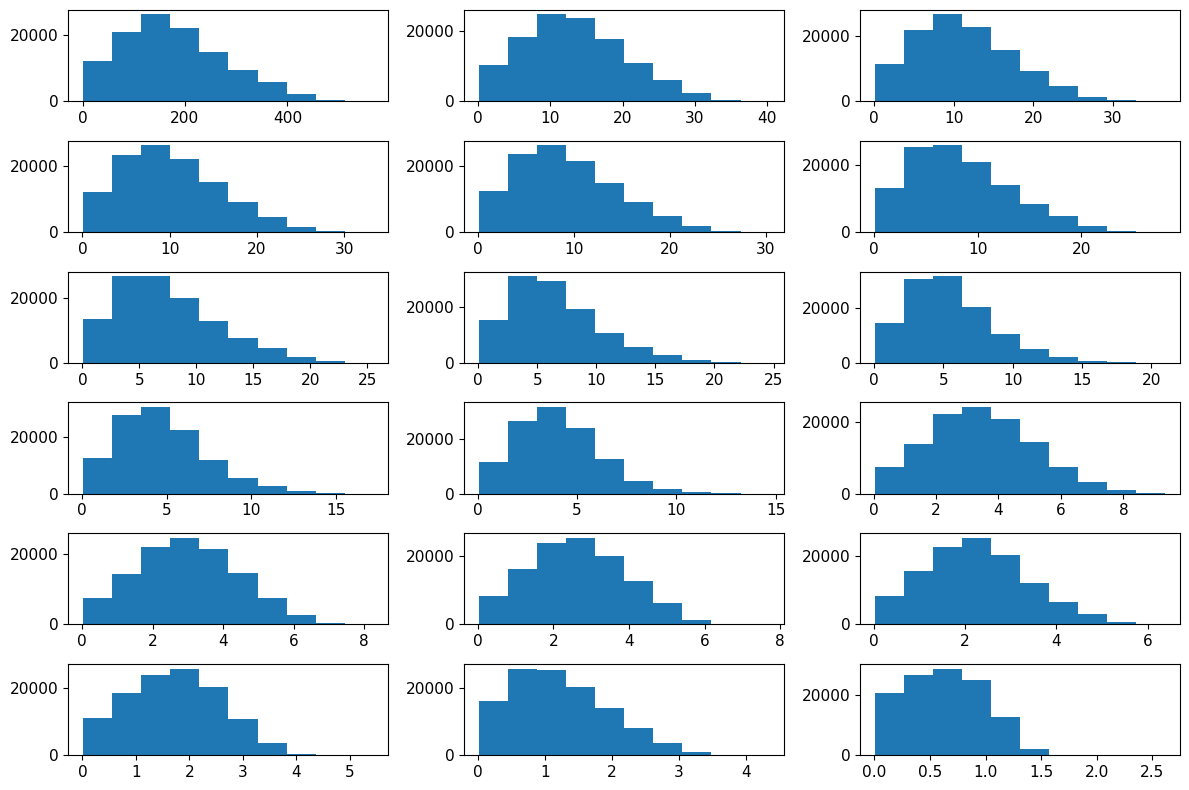

In [33]:
plt.figure(figsize = (20, 20))
fig, ax = plt.subplots(6, 3)
for i in range(6):
    for j in range(3):
        ax[i, j].hist((1/standardized_full_train_var)[:, 3*i + j])
        
plt.tight_layout()
plt.show()


Train scatter VAE:

In [34]:
# training_labels, error_training_labels = full_training_labels[:, :19], full_training_labels[:, 19:]
# test_labels, error_test_labels = full_test_labels[:, :19], full_test_labels[:, 19:]
# validation_labels, error_validation_labels = full_validation_labels[:, :19], full_validation_labels[:, 19:]

# vae = VAE(encoder, decoder)
# vae.compile(optimizer=keras.optimizers.Adam())
# vae.fit(full_train, epochs=5000, batch_size=256, callbacks=lr_callback)

### CHECKPOINTING:

class EpochCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, save_every=50, save_path='scatter_vae_checkpoints/ckpt-epoch-{epoch:02d}.weights.h5'):
        super().__init__()
        self.save_every = save_every
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_every == 0:
            filepath = self.save_path.format(epoch=epoch + 1)
            self.model.save_weights(filepath)
            print(f"\nCheckpoint saved at epoch {epoch + 1}")

# optimizer
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
# VAE
vae = VAE(encoder=encoder, decoder=decoder)
vae.compile(optimizer=optimizer)
# callbacks
z_mean_visualizer = ZMeanVisualizer(encoder=vae.encoder, val_data=standardized_full_test)
checkpoint = EpochCheckpoint(save_every=50)
per_dimension_mse = PlotPerDimensionReconstructionErrorCallback(val_data=standardized_full_test,
                                                                feature_names=None,  # Or None
                                                                every_n_epochs=5  # Adjust to your liking
                                                               )

Fit:

In [35]:
# # FIT
# # vae.fit(full_train, epochs=5000, batch_size=256, callbacks=lr_callback)
# history = vae.fit(x=standardized_full_train, 
#                   epochs=5000, batch_size=256, 
#                   validation_data=standardized_full_test,
#                   callbacks=[checkpoint],#, gradient_callback],
#                   # callbacks=[z_mean_visualizer, checkpoint, per_dimension_mse],
#                  )

Save:

In [36]:
# # save the model?
# encoder.save('encoder_scatter_vae.keras', overwrite=True)#, save_format='tf')
# decoder.save('decoder_scatter_vae.keras', overwrite=True)#, save_format='tf')
# # Save history object
# with open('scatter_vae_history.pkl', 'wb') as f:
#     pickle.dump(history.history, f)

In [37]:
# encoder.save('encoder_scatter_vae.h5', overwrite=True)
# decoder.save('decoder_scatter_vae.h5', overwrite=True)

Load encoder, decoder and history:

In [38]:
keras.utils.get_custom_objects().update({
    "mu_var": mu_var,
})

encoder = tf.keras.models.load_model('encoder_scatter_vae.keras')
decoder = tf.keras.models.load_model('decoder_scatter_vae.keras')

with open('scatter_vae_history.pkl', 'rb') as f:
    history = pickle.load(f)

len(history['total_loss'])

5000

Reconstruct mean and scatter:

In [39]:
testmean, testvar = encoder(standardized_full_test)
test_reconstruction_mean, test_reconstruction_log_scatter = decoder(tf.concat([testmean, testvar], axis=1))
# assemble them into one array
# log-scatter is log(s^2)
test_reconstruction = np.concatenate((test_reconstruction_mean, test_reconstruction_log_scatter), axis = 1)

standardized_full_test, test_reconstruction_mean, test_reconstruction_log_scatter

(array([[ 0.26717617,  0.58071564,  0.77119327, ..., -1.52597385,
         -2.393807  , -0.01417207],
        [ 1.30125899, -0.6162556 , -1.75398675, ..., -0.57727461,
         -1.83577885,  1.09054705],
        [ 0.2016009 , -0.34355209, -0.19853193, ..., -1.57218268,
         -2.69927255,  0.03122763],
        ...,
        [-0.76002689, -0.58530829, -0.48424128, ..., -1.21535052,
         -2.36629426,  0.27059182],
        [-0.36292976,  0.29027586,  0.34492908, ..., -1.03516076,
         -1.79247778,  0.35257556],
        [ 0.97252638, -2.01160426, -2.7254828 , ..., -0.99301136,
         -1.53083127,  0.48382272]]),
 <tf.Tensor: shape=(14374, 19), dtype=float32, numpy=
 array([[ 0.2790733 ,  0.3758668 ,  0.2957035 , ..., -0.08151778,
          0.30741403, -0.21644011],
        [ 1.3187824 , -0.3617935 , -0.7389544 , ...,  1.2978717 ,
          0.32897937, -0.09849185],
        [ 0.17557451, -0.11223354, -0.20288989, ...,  0.01275147,
         -0.02881047, -0.44713172],
        ...,


# PLOTS

Residuals:

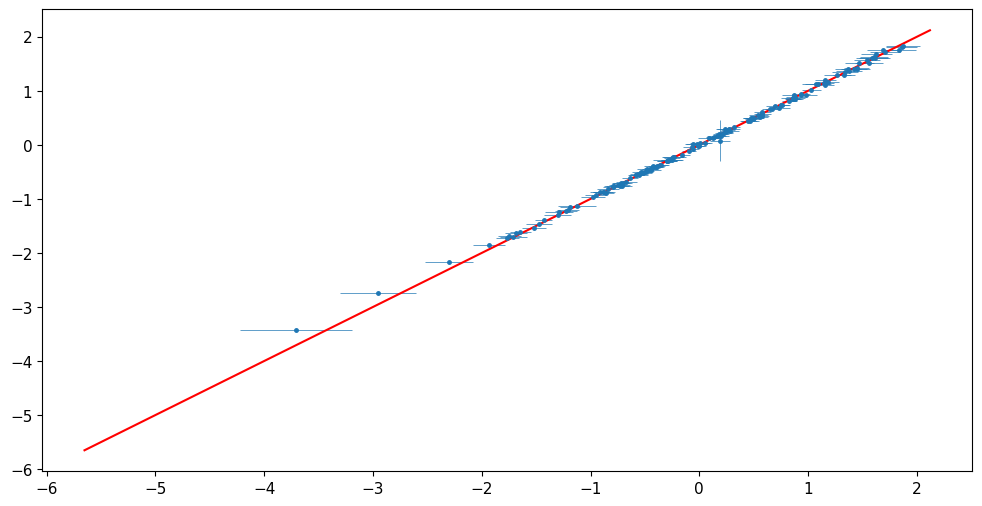

In [40]:
ind = 0  # 19 parameters, 0 to 18
samp_rate = 100

plt.figure(figsize = (12, 6))
plt.errorbar(standardized_full_test[:,ind][::samp_rate], test_reconstruction[:,ind][::samp_rate], xerr=np.exp(standardized_full_test[:,ind+19][::samp_rate]/2), yerr=np.exp(test_reconstruction[:,ind+19][::samp_rate]/2), fmt='.', markersize=5, elinewidth=0.5)
# plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
plt.plot(np.linspace(np.min(standardized_full_test[:,ind]), np.max(standardized_full_test[:,ind]), int(1e5)), np.linspace(np.min(standardized_full_test[:,ind]), np.max(standardized_full_test[:,ind]), int(1e5)), c='r')

# plt.xlim(-0.5, 0.4)
# plt.ylim(-0.5, 0.4)

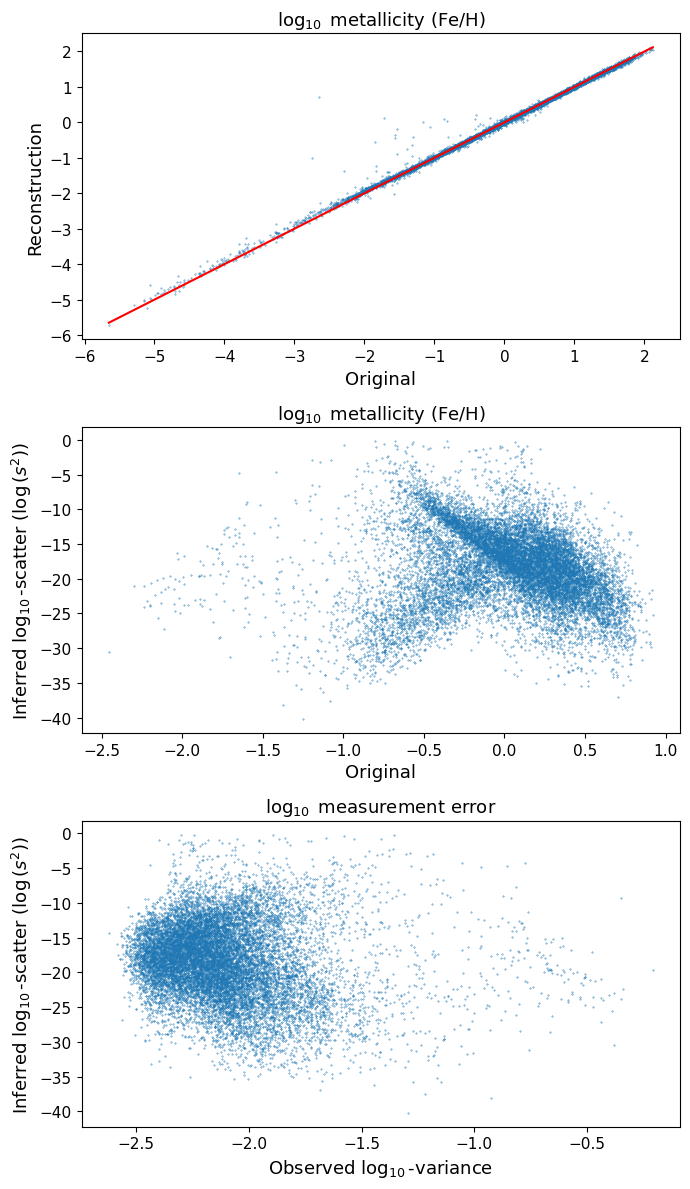

In [41]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (7, 12))
# plot the metallicity
ax0.scatter(standardized_full_test[:,0], test_reconstruction[:,0], s=0.1)
ax0.plot(np.linspace(np.min(standardized_full_test[:,0]), np.max(standardized_full_test[:,0]), int(1e5)), np.linspace(np.min(standardized_full_test[:,0]), np.max(standardized_full_test[:,0]), int(1e5)), c='r')
ax0.set_xlabel('Original'), ax0.set_ylabel('Reconstruction')
ax0.set_title(r'$\log_{10}$ metallicity (Fe/H)')
# scatter
ax1.set_title(r'$\log_{10}$ metallicity (Fe/H)')
ax1.scatter(np.log10(np.exp(standardized_full_test[:,0])), np.log10(np.exp(test_reconstruction[:,19])), s=0.1)
ax1.set_xlabel('Original'), ax1.set_ylabel(r'Inferred $\log_{10}$-scatter ($\log\left(s^2\right)$)')
# plot the scatter
ax2.set_title(r'$\log_{10}$ measurement error')
ax2.scatter(np.log10(np.exp(standardized_full_test[:,19])), np.log10(np.exp(test_reconstruction[:,19])), s=0.1)
# ax1.plot(np.linspace(np.log10(np.exp(np.min(standardized_full_test[:,19]))), np.log10(np.exp(np.max(standardized_full_test[:,19]))), int(1e5)), 
#          np.linspace(np.log10(np.exp(np.min(standardized_full_test[:,19]))), np.log10(np.exp(np.max(standardized_full_test[:,19]))), int(1e5)), c='r')
ax2.set_xlabel(r'Observed $\log_{10}$-variance'), ax2.set_ylabel(r'Inferred $\log_{10}$-scatter ($\log\left(s^2\right)$)')
# tight layout
plt.tight_layout()
plt.savefig('./paper_figures/scatter_metallicity_original_vs_reconstructed_one_vertical.png')# , fmt='png')

In [42]:
import matplotlib as mpl
plt.rc('font', size=18)

# fig = plt.figure(figsize = (14, 8))
# # ax = fig.add_subplot(111)    # The big subplot
# ax0 = fig.add_subplot(221)
# ax1 = fig.add_subplot(222)
# ax2 = fig.add_subplot(223)
# ax3 = fig.add_subplot(224)

# # invisible big subplot
# # ax.spines['top'].set_color('none')
# # ax.spines['bottom'].set_color('none')
# # ax.spines['left'].set_color('none')
# # ax.spines['right'].set_color('none')
# # ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# # plot the metallicity
# ax0.scatter(standardized_full_test[:,0], test_reconstruction[:,0], s=0.1)
# ax0.plot(np.linspace(np.min(standardized_full_test[:,0]), np.max(standardized_full_test[:,0]), int(1e5)), np.linspace(np.min(standardized_full_test[:,0]), np.max(standardized_full_test[:,0]), int(1e5)), c='r')
# ax0.set_xlabel('Original'), ax0.set_ylabel('Reconstructed')
# # plot the variance
# ax1.scatter(standardized_full_test[:,19], test_reconstruction[:,19], s=0.1)
# ax1.plot(np.linspace(np.min(standardized_full_test[:,19]), np.max(standardized_full_test[:,19]), int(1e5)), np.linspace(np.min(standardized_full_test[:,19]), np.max(standardized_full_test[:,19]), int(1e5)), c='r')
# ax1.set_xlabel('Original'), ax1.set_ylabel('Reconstructed')
# # plot the residuals of metallicity
# ax2.hist2d(standardized_full_test[:,0], standardized_full_test[:,0] - test_reconstruction[:,0], norm=mpl.colors.LogNorm(), bins=200)
# ax2.set_xlabel(r'metallicity')
# # ax2.scatter(standardized_full_test[:,0], standardized_full_test[:,0] - test_reconstruction[:,0], s=10)
# ax2.axhline(0, c='r')
# # plot the residuals of variance
# ax3.hist2d(standardized_full_test[:,19], standardized_full_test[:,19] - test_reconstruction[:,19], norm=mpl.colors.LogNorm(), bins=200)
# # ax3.scatter(standardized_full_test[:,19], standardized_full_test[:,19] - test_reconstruction[:,19], s=10)
# ax3.axhline(0, c='r')
# ax3.set_xlabel(r'metallicity error')
# # ax.set_xlabel('Original'), ax.set_ylabel('Reconstructed')
# plt.tight_layout()
# plt.savefig('metallicity_original_vs_reconstructed_all.png')

In [43]:
np.std(standardized_full_test[:,0] - test_reconstruction[:,0])

0.059158096122332984

In [44]:
np.mean(standardized_full_test[:,0] - test_reconstruction[:,0]), np.mean(standardized_full_test[:,19] - test_reconstruction[:,19])

(-0.007179176683546205, 37.644196715096086)

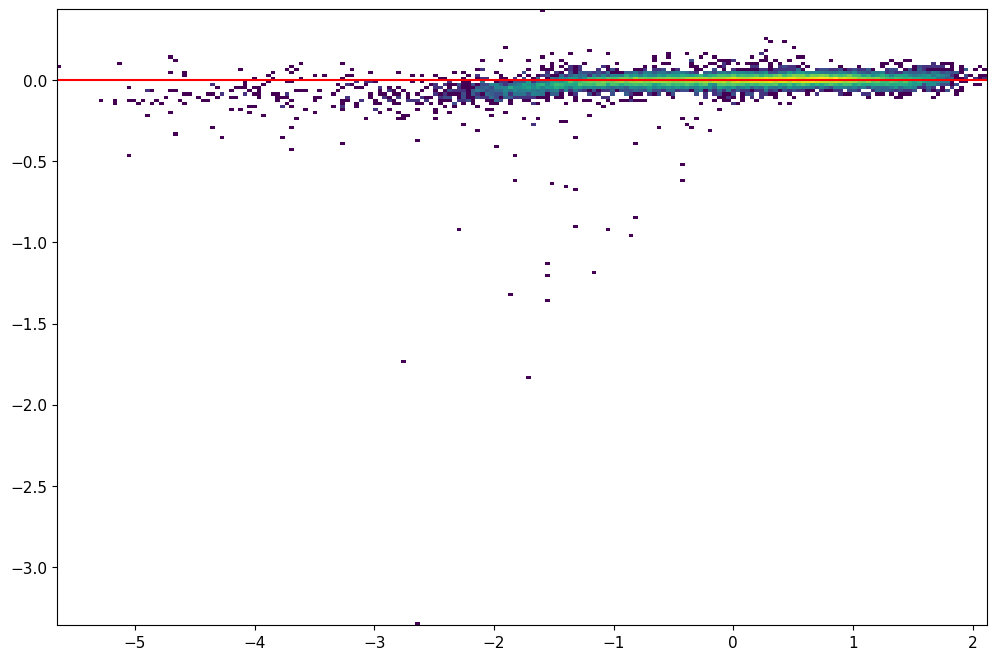

In [45]:
plt.hist2d(standardized_full_test[:,0], standardized_full_test[:,0] - test_reconstruction[:,0], norm=mpl.colors.LogNorm(), bins=200)
# plt.scatter(standardized_full_test[:,0], standardized_full_test[:,0] - test_reconstruction[:,0], s=10)
plt.axhline(0, c='r')
# plt.savefig('residuals.png', fmt='png')
plt.show()

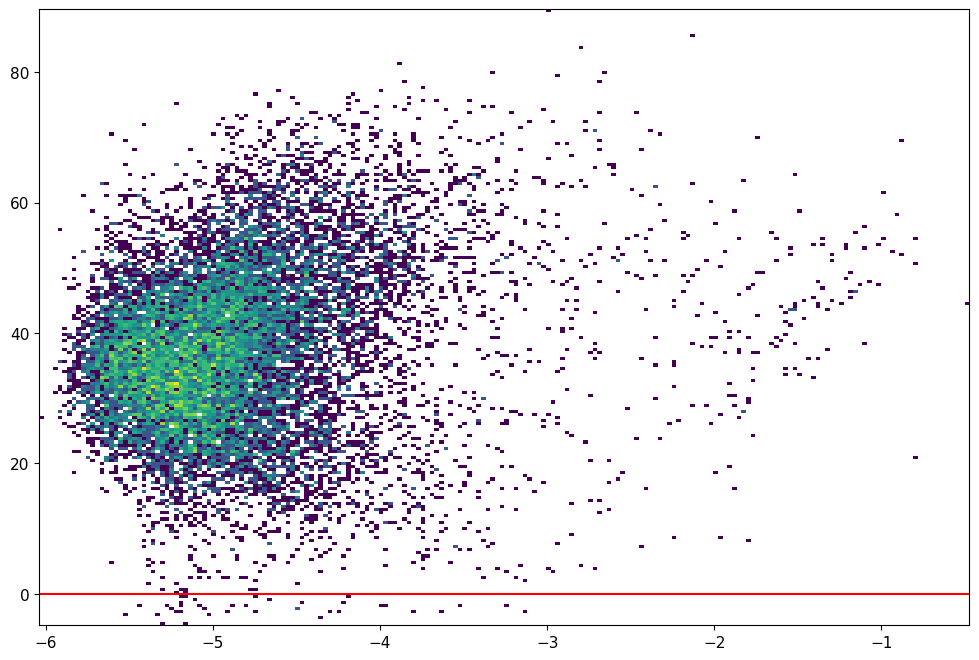

In [46]:
plt.hist2d(standardized_full_test[:,19], standardized_full_test[:,19] - test_reconstruction[:,19], norm=mpl.colors.LogNorm(), bins=200)
# plt.scatter(standardized_full_test[:,19], standardized_full_test[:,19] - test_reconstruction[:,19], s=10)
plt.axhline(0, c='r')
plt.show()

Abundances:

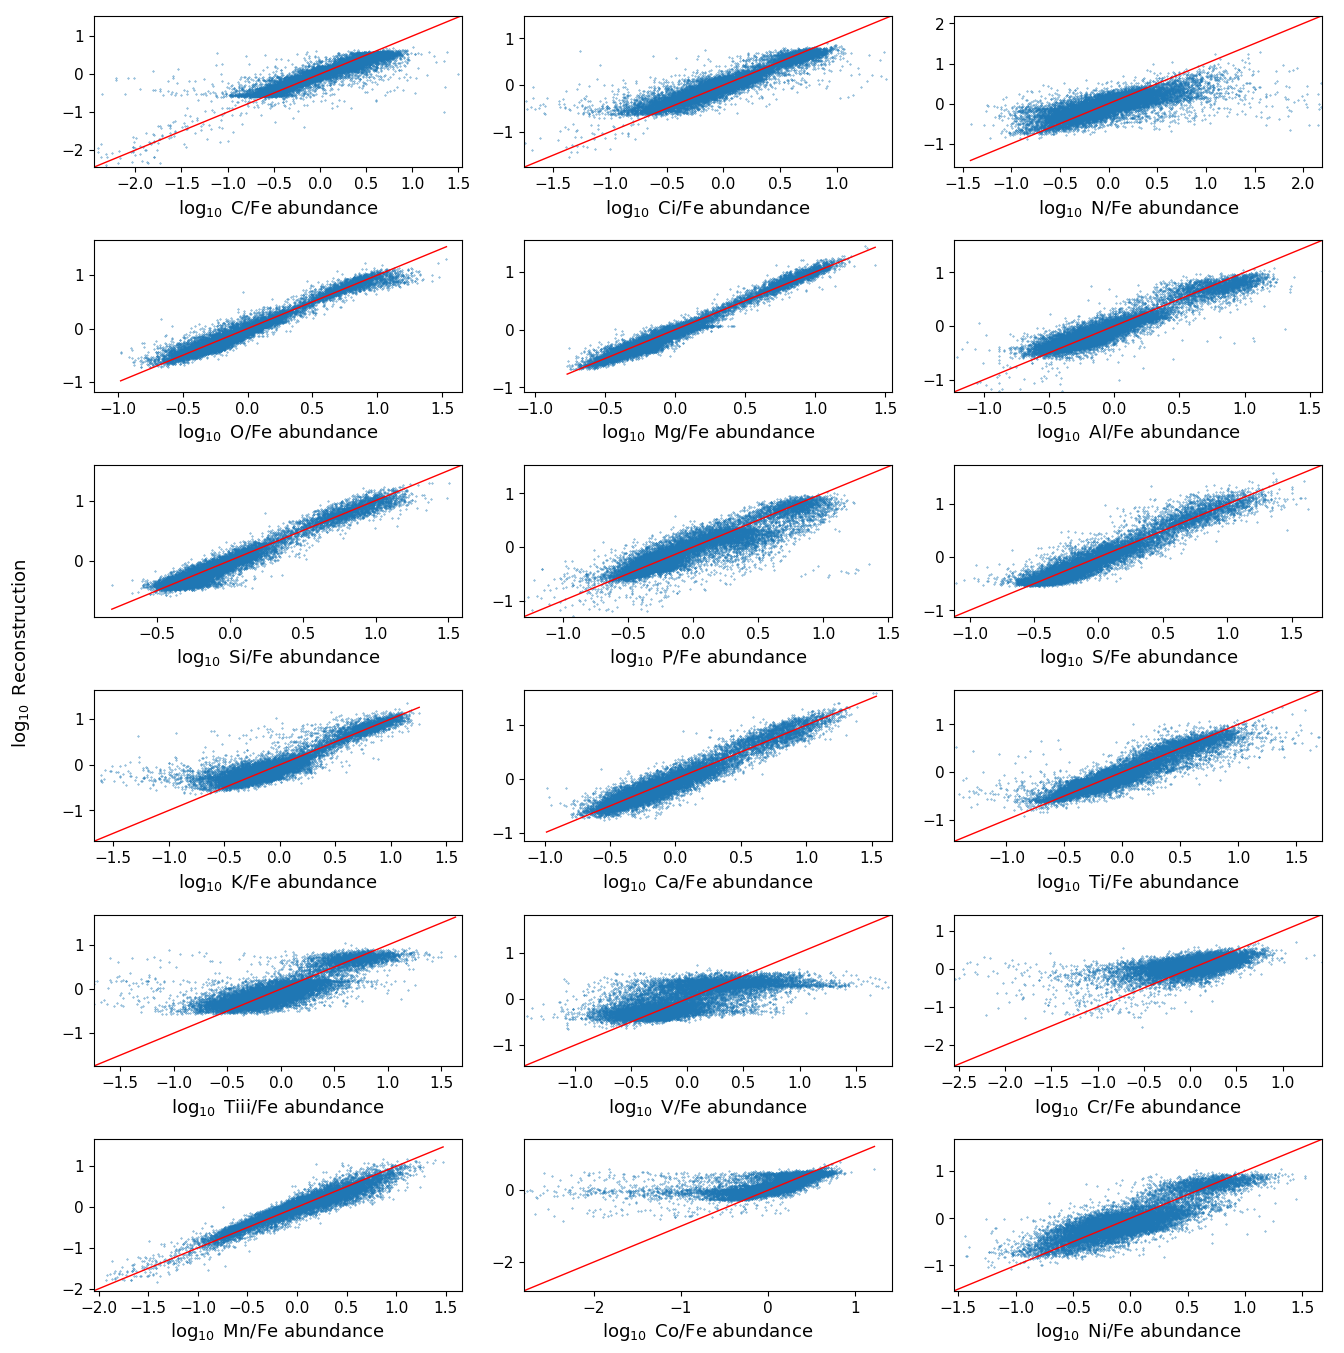

In [54]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 
              'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by
samp_rate = 1

# set this to 1 to plot the measurements, 20 to plot the errors
error = 1

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
ax2 = fig.add_subplot(111, frameon=False)
# Turn off the axis lines and ticks of the big subplots
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

for i in range(6):
    for j in range(3):
#         ax[i, j].errorbar(standardized_full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], 
#                           xerr=np.exp(standardized_full_test[:,3*i+j+error+error9][::samp_rate]/2), 
#                           yerr=np.exp(test_reconstruction[:,3*i+j+error+error9][::samp_rate]/2), 
#                           fmt='.', markersize=5, elinewidth=0.5)
        ax[i, j].scatter(np.log10(np.exp(standardized_full_test[:,3*i+j+error][::samp_rate])), 
                         np.log10(np.exp(test_reconstruction[:,3*i+j+error][::samp_rate])), s=0.1)
        ax[i, j].plot(np.linspace(np.min(np.log10(np.exp(standardized_full_test[:,3*i+j+error]))), np.max(np.log10(np.exp(standardized_full_test[:,3*i+j+error]))), int(1e5)), 
                      np.linspace(np.min(np.log10(np.exp(standardized_full_test[:,3*i+j+error]))), np.max(np.log10(np.exp(standardized_full_test[:,3*i+j+error]))), int(1e5)), c='r', linewidth=1)
        # label
        ax[i, j].set_xlabel(r'$\log_{10}$ ' + abundances[3*i+j+error] + ' abundance')# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(np.log10(np.exp(standardized_full_test[:,3*i+j+error])), (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_zorder(ax2.get_zorder() + 1)
        ax[i, j].patch.set_visible(False)
        
ax2.set_ylabel(r'$\log_{10}$ Reconstruction', labelpad=20)          
plt.tight_layout()
plt.savefig('./paper_figures/scatter_original_vs_reconstructed_all_abundances.png')#, fmt='png')
plt.show()

In [48]:
for i in range(0, 18):
    print(np.mean(standardized_full_test[:,i] - test_reconstruction[:,i]))

-0.007179176683546205
0.007279911732135709
-0.038375823238523225
0.10721584429950351
0.03433997948792616
0.0374030210180745
0.025365205295176784
0.059680224897971576
0.0941352262586052
0.012387507979113787
-0.06048673933782188
0.015115110487285371
0.04915546684399071
0.007013815978271048
0.02390085361342209
-0.18302682274845708
-0.0060088630253556695
-0.2629638959821368


Log-variance:

/tmp/ipykernel_203908/3682821994.py:25: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.exp(test_reconstruction[:,3*i+j+error][::samp_rate])), s=0.1)


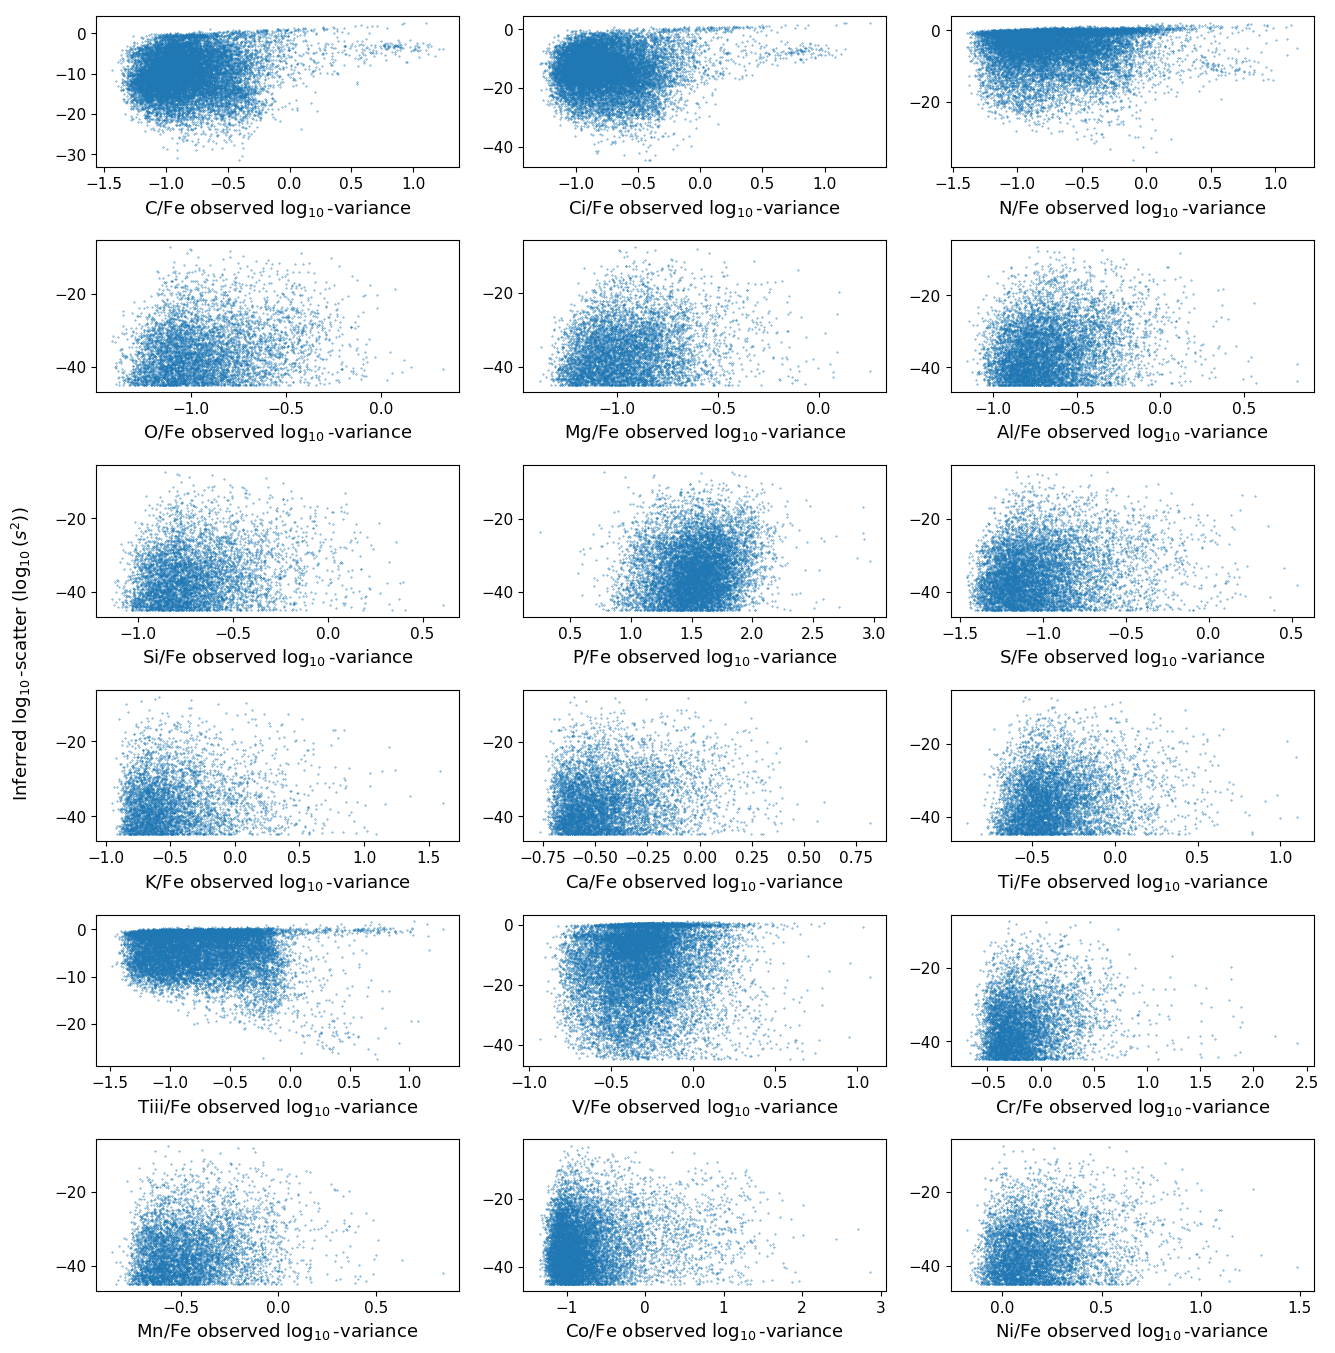

In [49]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 
              'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
samp_rate = 1

# set this to 1 to plot the measurements, 20 to plot the errors
error = 20

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
ax2 = fig.add_subplot(111, frameon=False)
# Turn off the axis lines and ticks of the big subplots
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

for i in range(6):
    for j in range(3):
#         ax[i, j].errorbar(standardized_full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], 
#                           xerr=np.exp(standardized_full_test[:,3*i+j+error+error9][::samp_rate]/2), 
#                           yerr=np.exp(test_reconstruction[:,3*i+j+error+error9][::samp_rate]/2), 
#                           fmt='.', markersize=5, elinewidth=0.5)
        ax[i, j].scatter(np.log10(np.exp(standardized_full_test[:,3*i+j+error][::samp_rate])), 
                         np.log10(np.exp(test_reconstruction[:,3*i+j+error][::samp_rate])), s=0.1)
        # ax[i, j].plot(np.linspace(np.min(standardized_full_test[:,3*i+j+error]), np.max(standardized_full_test[:,3*i+j+error]), int(1e5)), 
        #               np.linspace(np.min(standardized_full_test[:,3*i+j+error]), np.max(standardized_full_test[:,3*i+j+error]), int(1e5)), c='r', linewidth=1)
        # label
        ax[i, j].set_xlabel(abundances[3*i+j+1] + r' observed $\log_{10}$-variance')    
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(standardized_full_test[:,3*i+j+error], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # # scale it
        # ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        # ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        # Ensure the new subplot is behind the original one
        ax[i, j].set_zorder(ax2.get_zorder() + 1)
        ax[i, j].patch.set_visible(False)

np.log10(np.exp(test_reconstruction[:,19]))

np.log10(np.exp(test_reconstruction[:,19]))

ax2.set_ylabel(r'Inferred $\log_{10}$-scatter ($\log_{10}\left(s^2\right)$)', labelpad=20)  
plt.tight_layout()
plt.savefig('./paper_figures/scatter_original_vs_reconstructed_all_errors.png')#, fmt='png')
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.76087244, -1.73652441, -1.71217638, -1.68782835, -1.66348032,
        -1.6391323 , -1.61478427, -1.59043624, -1.56608821, -1.54174018,
        -1.51739215, -1.49304412, -1.46869609, -1.44434806, -1.42000003,
        -1.395652  , -1.37130397, -1.34695594, -1.32260792, -1.29825989,
        -1.27391186, -1.24956383, -1.2252158 , -1.20086777, -1.17651974,
        -1.15217171, -1.12782368, -1.10347565, -1.07912762, -1.05477959,
        -1.03043156, -1.00608353, -0.98173551, -0.95738748, -0.93303945,
        -0.90869142, -0.88434339, -0.85999536, -0.83564733, -0.8112993 ,
        -0.78695127, -0.76260324, -0.73825521, -0.71390718, -0.68955915,
        -0.66521112, -0.6408631 , -0.61651507, -0.59216704, -0.56781901,
        -0.54347098, 

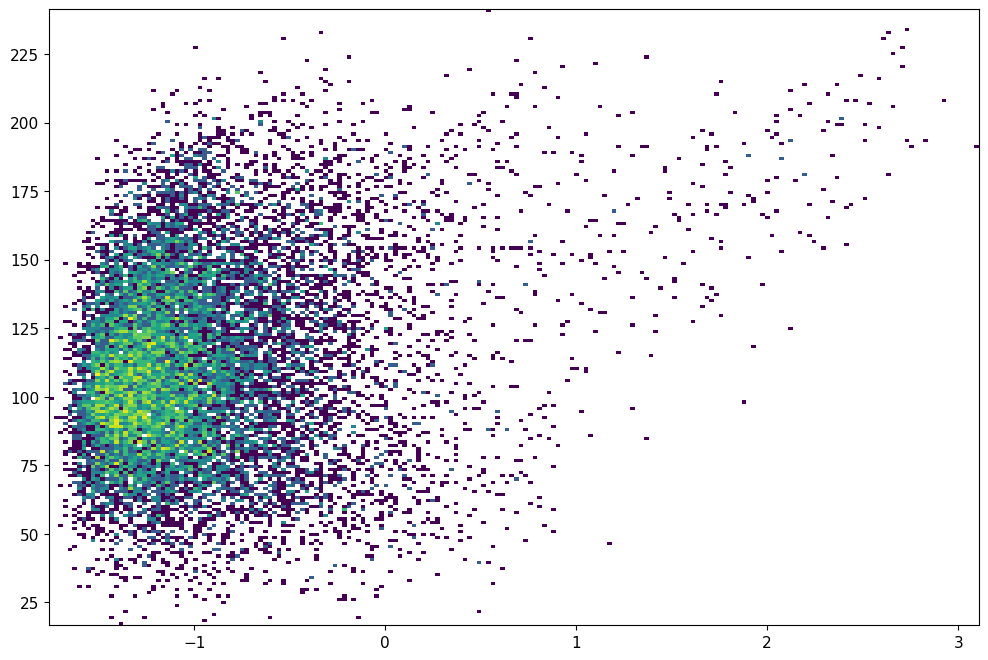

In [50]:
plt.hist2d(standardized_full_test[:,30], standardized_full_test[:,30] - test_reconstruction[:,30], norm=mpl.colors.LogNorm(), bins=200)

In [51]:
for i in range(19, 38):
    print(np.mean(standardized_full_test[:,i] - test_reconstruction[:,i]))

37.644196715096086
20.89945508489763
30.560271067865568
10.326447852367018
114.54532171923343
111.72723737255629
104.97553104108486
118.00334193654805
97.59045633959214
101.44415339062523
126.28103926750704
112.95266308706803
111.43489969856523
8.59222912465276
35.19684054337253
116.13097971824784
117.64061530632979
92.44777256953789
115.23121701328327


2D means of latent space points with errorbars given by their corresponding variances and coloured by some abundance:

In [52]:
# ind = 0  # index of parameter to colour by

# plt.figure(figsize = (12, 6))
# plt.scatter(testmean[:,0][::1000], testmean[:,1][::1000], c=standardized_full_test[:,ind][::1000], s=10, zorder=2)
# plt.errorbar(testmean[:,0][::1000], testmean[:,1][::1000], xerr=testvar[:,0][::1000], yerr=testvar[:,1][::1000], fmt='o', zorder=1)